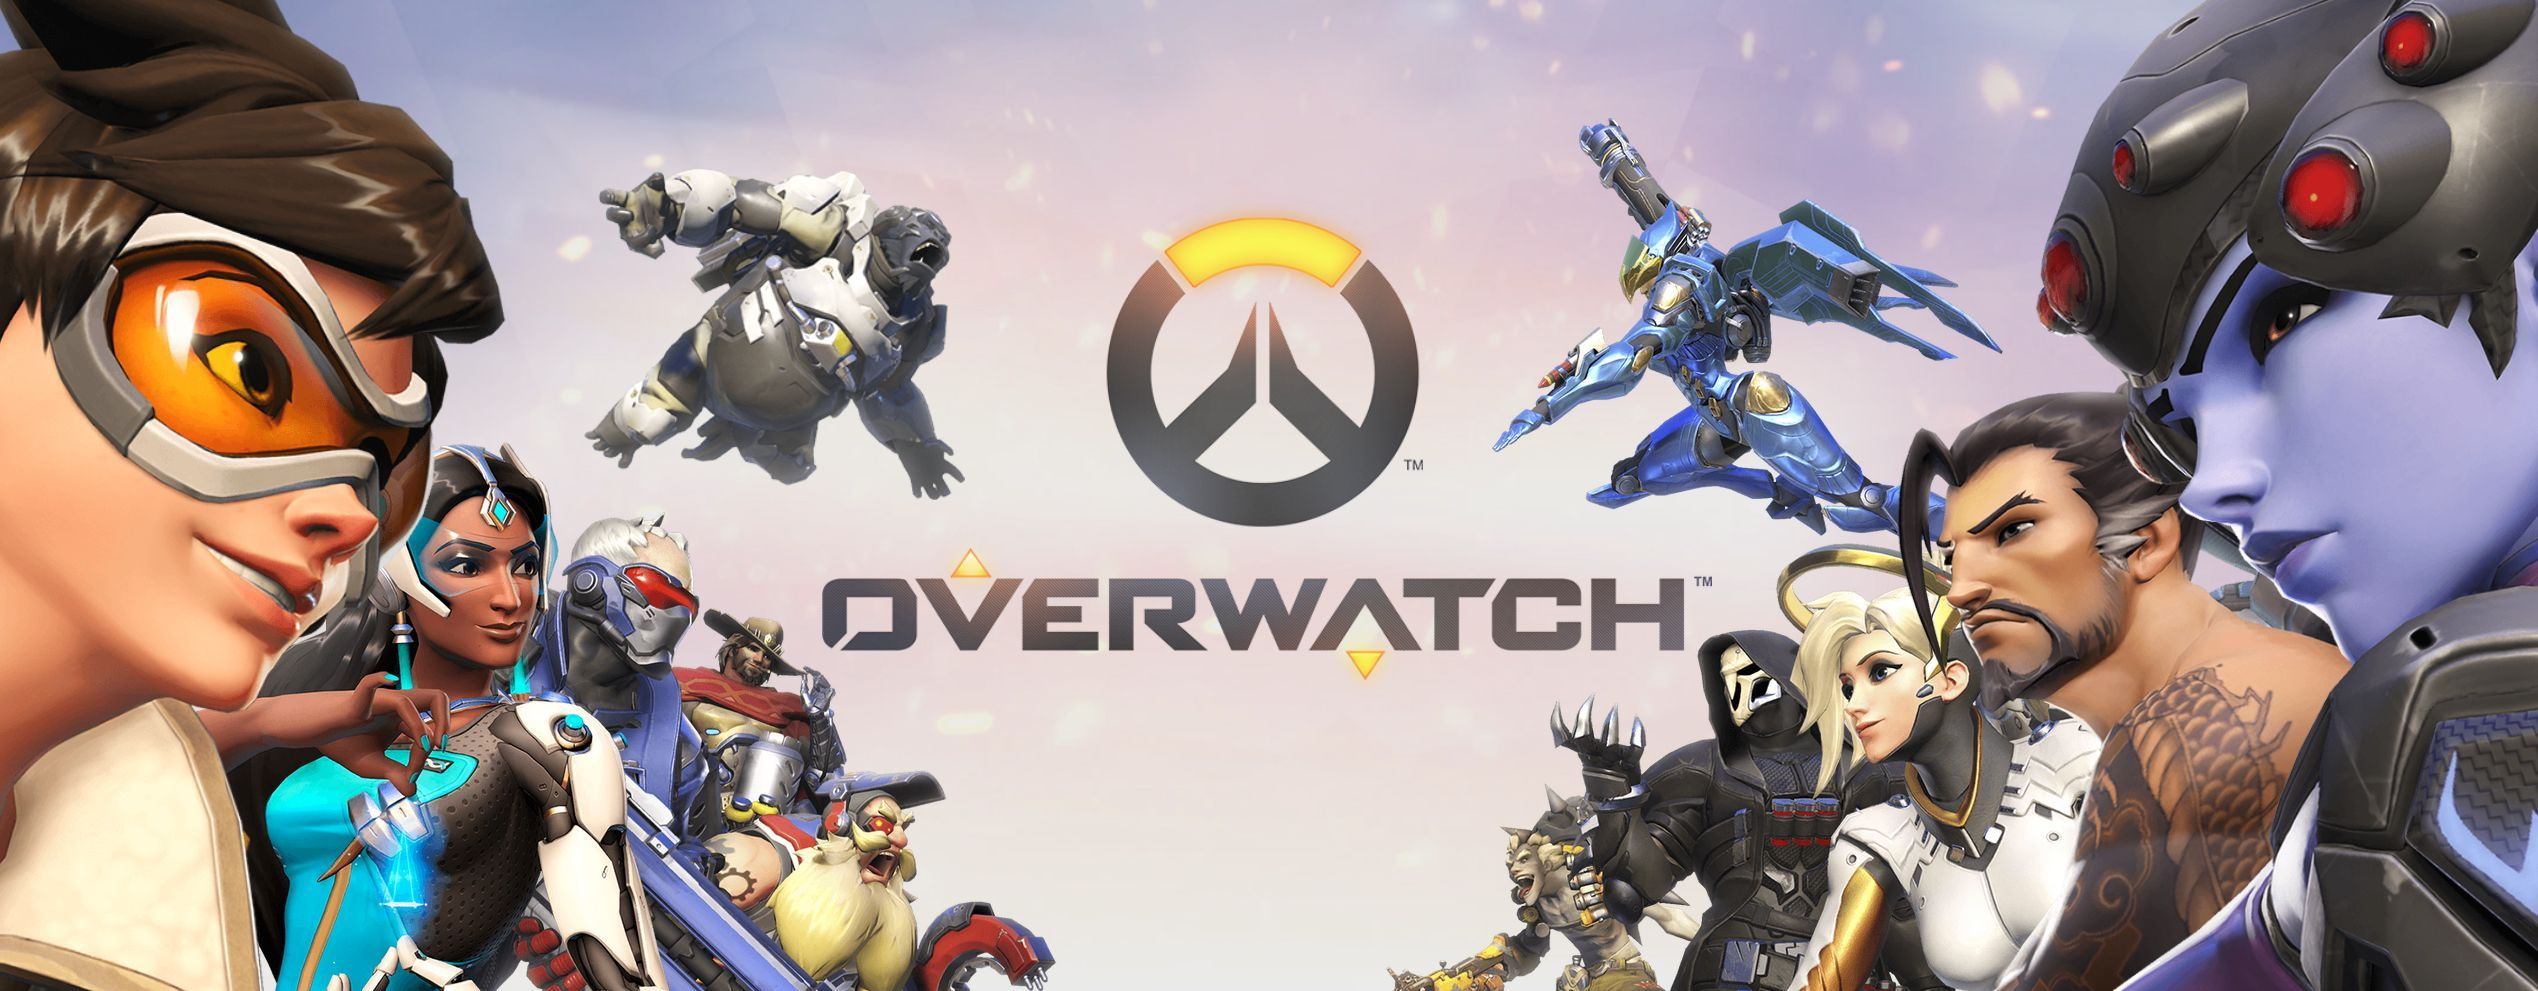

# OVERWATCH LEAGUE DATA ANALYSIS PART 1: DPS 2021

# Table of contents
1. [Introduction](#Introduction)
2. [Import Packages](#Import_packages)
3. [Read in data](#Read_in_data)
4. [Pre-process data](#Pre-process_data)<br>
    4a. [Ashe](#Ashe)<br>
    4b. [Bastion](#Bastion)<br>
    4c. [Doomfist](#Doomfist)<br>
    4d. [Echo](#Echo)<br>
    4e. [Genji](#Genji)<br>
    4f. [Hanzo](#Hanzo)<br>
    4g. [Junkrat](#Junkrat)<br>
    4h. [McCree](#McCree)<br>
    4i. [Mei](#Mei)<br>
    4j. [Pharah](#Pharah)<br>
    4k. [Reaper](#Reaper)<br>
    4l. [Soldier76](#Soldier76)<br>
    4m. [Sombra](#Sombra)<br>
    4n. [Symmetra](#Symmetra)<br>
    4o. [Torbjörn](#Torbjörn)<br>
    4p. [Tracer](#Tracer)<br>
    4q. [Widowmaker](#Widowmaker)<br>
    

<a name ="Introduction"></a>
## 1. Introduction

This project aims to act as a learning and portfolio piece for my career in data science by analysing the huge amount of data available to the public and carrying out meaningful analysis to analyse team, player and hero performance across a given year (perhaps even more). Initially this project will focus on OWL1, that is to say, Overwatch League played on Overwatch 1 (as of the time of writing at April 6th 2022, OWL2 is less than a month away). As a starting project it is important not to become overwhelmed or to take on too much, as such this initial foray into the data behind OWL1 will only focus on the dps role and will aim to determine the most impactful (or best) dps player in the 2021 season with the eventual goal of expanding into the other roles and eventually OWL2.

<a name ="Import_packages"></a>
## 2. Import Packages

In [1]:
# !pip install jupyter_contrib_nbextensions #enables us to create a table of contents

In [2]:
import numpy as np
import pandas as pd

<a name ="Read_in_data"></a>
## 3. Read in data

In [3]:
OWL_2021_data_filepath = r"C:\Users\jackb\Documents\PythonProjects\OWL\OWL_Data\2021\phs_2021_1.csv"

In [4]:
OWL_2021_df = pd.read_csv(OWL_2021_data_filepath)

In [5]:
OWL_2021_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000
...,...,...,...,...,...,...,...,...,...,...
1031553,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,Ultimates Used,Zarya,2.000000
1031554,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,Weapon Accuracy,Zarya,0.260870
1031555,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Zarya,0.919047
1031556,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Zarya,0.459524


Check data types. Note that when converting this data into a pandas dataframe, the data will appear as an object and as such has been converted below into datetime

In [6]:
OWL_2021_df.dtypes

start_time           object
esports_match_id      int64
tournament_title     object
map_type             object
map_name             object
player_name          object
team_name            object
stat_name            object
hero_name            object
stat_amount         float64
dtype: object

The command below only needs to be run once and will turn the start time strings into datetime

In [7]:
OWL_2021_df["start_time"] = pd.to_datetime(OWL_2021_df["start_time"])

Next we need to decide what data we want to proceed with when handling our data. This is the crux of the problem. As mentioned above I have decided initially to only start by analysing dps players as they should be easier to categorise in terms of damage. More specifically a good starting point is to calculate the effectiveness of a player on a specific hero for comparison.

<a name ="Pre-process_data"></a>
## 4. Pre-process data

We begin by separating out players into their roles, dps, tank and support. It should be considered that some players will play multiple roles throughout the year, i.e. Goats meta or mirror in 2020, as such a minimum amount of time spent on each hero should be considered. If this data is not available, a minimum amount of damage or kills can be considered instead

In [8]:
dps_heroes = ["Bastion", "Widowmaker", "Soldier 76", "Symmetra",
              "Doomfist", "Junkrat", "Sombra", "Ashe",
              "McCree", "Reaper", "Torbjörn", "Pharah",
              "Genji", "Hanzo", "Echo", "Mei", "Tracer"]

In [9]:
tank_heroes = ["D.Va", "Reinhardt", "Zarya", "Wrecking Ball", "Roadhog", "Winston", "Orisa", "Sigma"]

In [10]:
support_heroes =["Ana", "Mercy", "Brigitte", "Baptiste", "Lucio", "Moira", "Zenyatta"]

In [11]:
OWL_2021_df["hero_name"]

0          All Heroes
1          All Heroes
2          All Heroes
3          All Heroes
4          All Heroes
              ...    
1031553         Zarya
1031554         Zarya
1031555         Zarya
1031556         Zarya
1031557         Zarya
Name: hero_name, Length: 1031558, dtype: object

In [12]:
dps_filter = OWL_2021_df["hero_name"].isin(dps_heroes)

In [13]:
tank_filter = OWL_2021_df["hero_name"].isin(tank_heroes)

In [14]:
support_filter = OWL_2021_df["hero_name"].isin(support_heroes)

In [15]:
OWL_2021_dps_filtered_df = OWL_2021_df[dps_filter]

In [16]:
OWL_2021_dps_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
25,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Echo,314.000000
26,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Echo,16.881001
27,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Critical Hit Accuracy,Echo,0.111111
28,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Critical Hits,Echo,2.000000
29,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Sticky Bombs,Echo,90.000000
...,...,...,...,...,...,...,...,...,...,...
1031318,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Ultimates Used,Widowmaker,1.000000
1031319,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Weapon Accuracy,Widowmaker,0.529412
1031320,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Widowmaker,0.167209
1031321,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Widowmaker,0.167209


In [17]:
OWL_2021_dps_filtered_df.shape

(284277, 10)

To analyse the dps role as a whole, we will need to consider the effectiveness of each player on a variety of heroes. To do this we must further filter down into each individual hero.

<a name ="Ashe"></a>
### 4a. Ashe

In [18]:
Ashe_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Ashe"]

In [19]:
Ashe_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
1055,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,All Damage Done,Ashe,3221.171927
1056,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Assists,Ashe,4.000000
1057,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Average Time Alive,Ashe,62.748002
1058,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Barrier Damage Done,Ashe,854.000000
1059,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Bob Gun Damage,Ashe,159.000000
...,...,...,...,...,...,...,...,...,...,...
1029489,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,Ultimates Used,Ashe,1.000000
1029490,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,Weapon Accuracy,Ashe,0.364865
1029491,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,NaN,Ashe,0.222729
1029492,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,NaN,Ashe,0.222729


<a name ="Bastion"></a>
### 4b. Bastion

In [20]:
Bastion_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Bastion"]

In [21]:
Bastion_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
9233,2021-04-16 22:50:23,37233,OWL 2021,ASSAULT,Hanamura,MirroR,Los Angeles Gladiators,All Damage Done,Bastion,4653.929022
9234,2021-04-16 22:50:23,37233,OWL 2021,ASSAULT,Hanamura,MirroR,Los Angeles Gladiators,Average Time Alive,Bastion,44.662668
9235,2021-04-16 22:50:23,37233,OWL 2021,ASSAULT,Hanamura,MirroR,Los Angeles Gladiators,Barrier Damage Done,Bastion,2503.417336
9236,2021-04-16 22:50:23,37233,OWL 2021,ASSAULT,Hanamura,MirroR,Los Angeles Gladiators,Critical Hit Accuracy,Bastion,0.006410
9237,2021-04-16 22:50:23,37233,OWL 2021,ASSAULT,Hanamura,MirroR,Los Angeles Gladiators,Critical Hit Kills,Bastion,1.000000
...,...,...,...,...,...,...,...,...,...,...
803644,2021-08-08 19:23:31,37341,OWL 2021,PAYLOAD,Route 66,bqb,Florida Mayhem,Time Played,Bastion,53.533879
803645,2021-08-08 19:23:31,37341,OWL 2021,PAYLOAD,Route 66,bqb,Florida Mayhem,Ultimates Earned - Fractional,Bastion,0.992209
803646,2021-08-08 19:23:31,37341,OWL 2021,PAYLOAD,Route 66,bqb,Florida Mayhem,Weapon Accuracy,Bastion,0.276316
803647,2021-08-08 19:23:31,37341,OWL 2021,PAYLOAD,Route 66,bqb,Florida Mayhem,NaN,Bastion,0.044041


<a name ="Doomfist"></a>
### 4c. Doomfist

In [22]:
Doomfist_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Doomfist"]

In [23]:
Doomfist_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
627,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Ability Damage Done,Doomfist,1220.459969
628,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,All Damage Done,Doomfist,2544.733312
629,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Assists,Doomfist,1.000000
630,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Average Time Alive,Doomfist,44.284001
631,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Barrier Damage Done,Doomfist,661.248443
...,...,...,...,...,...,...,...,...,...,...
1029500,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,Time Played,Doomfist,2.919962
1029501,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,Ultimates Earned - Fractional,Doomfist,0.008929
1029502,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,NaN,Doomfist,0.005786
1029503,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,NaN,Doomfist,0.002893


<a name ="Echo"></a>
### 4d. Echo

In [24]:
Echo_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Echo"]

In [25]:
Echo_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
25,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Echo,314.000000
26,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Echo,16.881001
27,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Critical Hit Accuracy,Echo,0.111111
28,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Critical Hits,Echo,2.000000
29,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Sticky Bombs,Echo,90.000000
...,...,...,...,...,...,...,...,...,...,...
1030932,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,Ultimates Used,Echo,4.000000
1030933,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,Weapon Accuracy,Echo,0.262264
1030934,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,NaN,Echo,0.477945
1030935,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,NaN,Echo,0.477945


<a name ="Genji"></a>
### 4e. Genji

In [26]:
Genji_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Genji"]

In [27]:
Genji_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
3252,2021-04-16 19:56:41,37234,OWL 2021,PAYLOAD,Havana,SP9RK1E,Dallas Fuel,All Damage Done,Genji,13574.987519
3253,2021-04-16 19:56:41,37234,OWL 2021,PAYLOAD,Havana,SP9RK1E,Dallas Fuel,Assists,Genji,9.000000
3254,2021-04-16 19:56:41,37234,OWL 2021,PAYLOAD,Havana,SP9RK1E,Dallas Fuel,Average Time Alive,Genji,65.065002
3255,2021-04-16 19:56:41,37234,OWL 2021,PAYLOAD,Havana,SP9RK1E,Dallas Fuel,Barrier Damage Done,Genji,5552.177858
3256,2021-04-16 19:56:41,37234,OWL 2021,PAYLOAD,Havana,SP9RK1E,Dallas Fuel,Critical Hit Accuracy,Genji,0.114650
...,...,...,...,...,...,...,...,...,...,...
1028886,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,PELICAN,Atlanta Reign,Time Played,Genji,70.083917
1028887,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,PELICAN,Atlanta Reign,Ultimates Earned - Fractional,Genji,0.917561
1028888,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,PELICAN,Atlanta Reign,Weapon Accuracy,Genji,0.392308
1028889,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,PELICAN,Atlanta Reign,NaN,Genji,0.070033


<a name ="Hanzo"></a>
### 4f. Hanzo

In [28]:
Hanzo_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Hanzo"]

In [29]:
Hanzo_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
1553,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Doha,Dallas Fuel,All Damage Done,Hanzo,9738.745072
1554,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Doha,Dallas Fuel,Average Time Alive,Hanzo,130.516671
1555,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Doha,Dallas Fuel,Barrier Damage Done,Hanzo,4256.580383
1556,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Doha,Dallas Fuel,Critical Hit Accuracy,Hanzo,0.058824
1557,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Doha,Dallas Fuel,Critical Hit Kills,Hanzo,3.000000
...,...,...,...,...,...,...,...,...,...,...
1031222,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Ultimates Used,Hanzo,2.000000
1031223,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Weapon Accuracy,Hanzo,0.405660
1031224,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Hanzo,0.702426
1031225,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Hanzo,0.351213


<a name ="Junkrat"></a>
### 4g. Junkrat

In [30]:
Junkrat_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Junkrat"]

In [31]:
Junkrat_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
7627,2021-04-16 21:54:15,37233,OWL 2021,HYBRID,Eichenwalde,kevster,Los Angeles Gladiators,Average Time Alive,Junkrat,8.868000
7628,2021-04-16 21:54:15,37233,OWL 2021,HYBRID,Eichenwalde,kevster,Los Angeles Gladiators,Quick Melee Ticks,Junkrat,1.000000
7629,2021-04-16 21:54:15,37233,OWL 2021,HYBRID,Eichenwalde,kevster,Los Angeles Gladiators,Shots Fired,Junkrat,4.000000
7630,2021-04-16 21:54:15,37233,OWL 2021,HYBRID,Eichenwalde,kevster,Los Angeles Gladiators,Shots Missed,Junkrat,2.000000
7631,2021-04-16 21:54:15,37233,OWL 2021,HYBRID,Eichenwalde,kevster,Los Angeles Gladiators,Time Alive,Junkrat,8.868000
...,...,...,...,...,...,...,...,...,...,...
1004837,2021-09-24 01:48:39,37446,OWL 2021,ASSAULT,Temple of Anubis,JinMu,Chengdu Hunters,Time Played,Junkrat,38.939980
1004838,2021-09-24 01:48:39,37446,OWL 2021,ASSAULT,Temple of Anubis,JinMu,Chengdu Hunters,Ultimates Earned - Fractional,Junkrat,0.283117
1004839,2021-09-24 01:48:39,37446,OWL 2021,ASSAULT,Temple of Anubis,JinMu,Chengdu Hunters,Weapon Accuracy,Junkrat,0.133333
1004840,2021-09-24 01:48:39,37446,OWL 2021,ASSAULT,Temple of Anubis,JinMu,Chengdu Hunters,NaN,Junkrat,0.038992


<a name ="McCree"></a>
### 4h. McCree

In [32]:
McCree_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "McCree"]

In [33]:
McCree_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
1098,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,All Damage Done,McCree,10798.905924
1099,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Assists,McCree,9.000000
1100,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Average Time Alive,McCree,80.292002
1101,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Barrier Damage Done,McCree,3595.763618
1102,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Happy,Houston Outlaws,Critical Hit Accuracy,McCree,0.111111
...,...,...,...,...,...,...,...,...,...,...
1030487,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,Ultimates Earned - Fractional,McCree,1.193452
1030488,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,Ultimates Used,McCree,1.000000
1030489,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,Weapon Accuracy,McCree,0.450000
1030490,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,NaN,McCree,0.245060


<a name ="Mei"></a>
### 4i. Mei

In [34]:
Mei_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Mei"]

In [35]:
Mei_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
49,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Mei,6821.048721
50,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,Mei,1.000000
51,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Mei,57.154502
52,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,Mei,543.810000
53,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Blizzard Efficiency,Mei,1.000000
...,...,...,...,...,...,...,...,...,...,...
1029291,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,Fleta,Shanghai Dragons,Ultimates Used,Mei,2.000000
1029292,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,Fleta,Shanghai Dragons,Weapon Accuracy,Mei,0.250000
1029293,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,Fleta,Shanghai Dragons,NaN,Mei,0.659668
1029294,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,Fleta,Shanghai Dragons,NaN,Mei,0.329834


<a name ="Pharah"></a>
### 4j. Pharah

In [36]:
Pharah_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Pharah"]

In [37]:
Pharah_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
2319,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Average Time Alive,Pharah,2.976000
2320,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Time Alive,Pharah,2.976000
2321,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Time Building Ultimate,Pharah,2.981000
2322,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Time Elapsed per Ultimate Earned,Pharah,626.009995
2323,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Danteh,Houston Outlaws,Time Played,Pharah,1.944687
...,...,...,...,...,...,...,...,...,...,...
1027611,2021-09-26 01:25:54,37441,OWL 2021,ASSAULT,Hanamura,Fleta,Shanghai Dragons,Weapon Accuracy,Pharah,0.409357
1027612,2021-09-26 01:25:54,37441,OWL 2021,ASSAULT,Hanamura,Fleta,Shanghai Dragons,of Rockets Fired,Pharah,0.146199
1027613,2021-09-26 01:25:54,37441,OWL 2021,ASSAULT,Hanamura,Fleta,Shanghai Dragons,NaN,Pharah,0.424973
1027614,2021-09-26 01:25:54,37441,OWL 2021,ASSAULT,Hanamura,Fleta,Shanghai Dragons,NaN,Pharah,0.424973


<a name ="Reaper"></a>
### 4k. Reaper

In [38]:
Reaper_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Reaper"]

In [39]:
Reaper_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
89,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Reaper,493.158979
90,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Reaper,25.962001
91,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,Reaper,336.000000
92,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Weapon,Reaper,157.158979
93,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage Taken,Reaper,441.265885
...,...,...,...,...,...,...,...,...,...,...
1031246,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Ultimates Earned - Fractional,Reaper,0.682339
1031247,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Weapon Accuracy,Reaper,0.457300
1031248,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Reaper,0.053589
1031249,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Reaper,0.107178


<a name ="Soldier76"></a>
### 4l. Soldier 76

In [40]:
Soldier76_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Soldier 76"]

In [41]:
Soldier76_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
4132,2021-04-16 20:27:21,37234,OWL 2021,ASSAULT,Volskaya Industries,Doha,Dallas Fuel,Time Alive,Soldier 76,0.097000
4133,2021-04-16 20:27:21,37234,OWL 2021,ASSAULT,Volskaya Industries,Doha,Dallas Fuel,Time Building Ultimate,Soldier 76,0.098000
7234,2021-04-16 21:30:40,37233,OWL 2021,CONTROL,Ilios,nero,San Francisco Shock,All Damage Done,Soldier 76,13779.961855
7235,2021-04-16 21:30:40,37233,OWL 2021,CONTROL,Ilios,nero,San Francisco Shock,Assists,Soldier 76,6.000000
7236,2021-04-16 21:30:40,37233,OWL 2021,CONTROL,Ilios,nero,San Francisco Shock,Barrier Damage Done,Soldier 76,4457.407722
...,...,...,...,...,...,...,...,...,...,...
1013131,2021-09-24 04:29:54,37430,OWL 2021,ASSAULT,Volskaya Industries,LIP,Shanghai Dragons,Time Elapsed per Ultimate Earned,Soldier 76,507.333766
1013132,2021-09-24 04:29:54,37430,OWL 2021,ASSAULT,Volskaya Industries,LIP,Shanghai Dragons,Time Played,Soldier 76,8.766165
1013133,2021-09-24 04:29:54,37430,OWL 2021,ASSAULT,Volskaya Industries,LIP,Shanghai Dragons,Ultimates Earned - Fractional,Soldier 76,0.017316
1013134,2021-09-24 04:29:54,37430,OWL 2021,ASSAULT,Volskaya Industries,LIP,Shanghai Dragons,NaN,Soldier 76,0.010904


<a name ="Sombra"></a>
### 4m. Sombra

In [42]:
Sombra_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Sombra"]

In [43]:
Sombra_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
108,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Sombra,6272.472394
109,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,Sombra,7.000000
110,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Sombra,178.858005
111,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,Sombra,615.682156
112,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Critical Hit Accuracy,Sombra,0.076167
...,...,...,...,...,...,...,...,...,...,...
1031281,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Ultimates Used,Sombra,2.000000
1031282,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Weapon Accuracy,Sombra,0.449907
1031283,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Sombra,0.428909
1031284,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Sombra,0.428909


<a name ="Symmetra"></a>
### 4n. Symmetra

In [44]:
Symmetra_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Symmetra"]

In [45]:
Symmetra_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
145,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Players per Teleporter,Symmetra,5.000000
146,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Symmetra,3.550000
147,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Players Teleported,Symmetra,5.000000
148,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Teleporter Uptime,Symmetra,2.541000
149,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Teleporters Placed,Symmetra,1.000000
...,...,...,...,...,...,...,...,...,...,...
1029613,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,Time Played,Symmetra,9.723909
1029614,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,Ultimates Earned - Fractional,Symmetra,0.026786
1029615,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,NaN,Symmetra,0.009634
1029616,2021-09-26 01:51:30,37441,OWL 2021,HYBRID,King's Row,LIP,Shanghai Dragons,NaN,Symmetra,0.009634


<a name ="Torbjörn"></a>
### 4o. Torbjörn

In [46]:
Torb_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Torbjörn"]

In [47]:
Torb_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
10590,2021-04-17 09:10:20,37256,OWL 2021,CONTROL,Lijiang Tower,ChoiSehwan,Guangzhou Charge,All Damage Done,Torbjörn,4522.661369
10591,2021-04-17 09:10:20,37256,OWL 2021,CONTROL,Lijiang Tower,ChoiSehwan,Guangzhou Charge,Assists,Torbjörn,5.000000
10592,2021-04-17 09:10:20,37256,OWL 2021,CONTROL,Lijiang Tower,ChoiSehwan,Guangzhou Charge,Barrier Damage Done,Torbjörn,835.119983
10593,2021-04-17 09:10:20,37256,OWL 2021,CONTROL,Lijiang Tower,ChoiSehwan,Guangzhou Charge,Critical Hit Accuracy,Torbjörn,0.200000
10594,2021-04-17 09:10:20,37256,OWL 2021,CONTROL,Lijiang Tower,ChoiSehwan,Guangzhou Charge,Critical Hit Kills,Torbjörn,1.000000
...,...,...,...,...,...,...,...,...,...,...
1030564,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,Ultimates Earned - Fractional,Torbjörn,1.192810
1030565,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,Ultimates Used,Torbjörn,1.000000
1030566,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,Weapon Accuracy,Torbjörn,0.165000
1030567,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,PELICAN,Atlanta Reign,NaN,Torbjörn,0.183835


<a name ="Tracer"></a>
### 4p. Tracer

In [48]:
Tracer_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Tracer"]

In [49]:
Tracer_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
673,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,All Damage Done,Tracer,11889.203227
674,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Assists,Tracer,9.000000
675,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Average Time Alive,Tracer,92.901503
676,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Barrier Damage Done,Tracer,3233.383745
677,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,SP9RK1E,Dallas Fuel,Critical Hit Accuracy,Tracer,0.067098
...,...,...,...,...,...,...,...,...,...,...
1030975,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,Ultimates Used,Tracer,3.000000
1030976,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,Weapon Accuracy,Tracer,0.400591
1030977,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,NaN,Tracer,0.522976
1030978,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,Fleta,Shanghai Dragons,NaN,Tracer,0.522976


<a name ="Widowmaker"></a>
### 4q. Widowmaker

In [50]:
Widowmaker_2021_filtered_df = OWL_2021_dps_filtered_df[OWL_2021_dps_filtered_df["hero_name"] == "Widowmaker"]

In [51]:
Widowmaker_2021_filtered_df

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
2452,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Happy,Houston Outlaws,All Damage Done,Widowmaker,111.563484
2453,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Happy,Houston Outlaws,Average Time Alive,Widowmaker,4.558000
2454,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Happy,Houston Outlaws,Barrier Damage Done,Widowmaker,111.563484
2455,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Happy,Houston Outlaws,Shots Fired,Widowmaker,1.000000
2456,2021-04-16 19:30:49,37234,OWL 2021,HYBRID,King's Row,Happy,Houston Outlaws,Time Alive,Widowmaker,4.558000
...,...,...,...,...,...,...,...,...,...,...
1031318,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Ultimates Used,Widowmaker,1.000000
1031319,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,Weapon Accuracy,Widowmaker,0.529412
1031320,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Widowmaker,0.167209
1031321,2021-09-26 02:53:59,37441,OWL 2021,PAYLOAD,Havana,LIP,Shanghai Dragons,NaN,Widowmaker,0.167209
